## Trappist-1 System
The primary focus of this exercise is to analyse the recently discovered Trappist-1 system and to determine which of the planets would be best for “planet watching”. The prime conditions for planet watching are to have the most neighbouring planets, on average, that are close enough to resolve objects 1000 km across. 

First, the planets of the Trappist-1 system are lined up on the positive x-axis according the the given distances in parameters.py. Trappist-1 is placed on the negative x-axis so that the origin is the Center of Mass (CM) of the star system using,

\begin{equation}
r_{star} = - \frac{\sum_p m_p r_p}{m_{star}},
\end{equation}

where $r_{star}$ is the Trappist-1's initial position, $m_p$ and $r_p$ are the masses and initial positions of the planets, and $m_{star}$ is Trappist-1's mass. 

The initial velocities of the planets are found using,

\begin{equation}
\vec{v}_{ap} = \sqrt{ \frac{G m_{star}}{a} \frac{1-e}{1+e} } \hat{y},
\end{equation}

where $\vec{v}_{ap}$ is the velocity at aphelion, $G$ is the universal gravitational constant (written in units of mAU$^3$ / trappist$_1$ mass / days$^2$), $a$ is the semi-major axis of the planet, and $e$ is the eccentricity of the planet's orbit. The initial velocity of Trappist-1 is set so the momentum of the entire system about the CM is equal to 0. This is shown by,

\begin{equation}
\vec{v}_{star} = - \frac{ \sum_p m_p \vec{v_p} }{m_{star}} \hat{y},
\end{equation}

where $\vec{v}_{star}$ is Trappist-1's initial velocity and $\vec{v}_p$ is the initial velocity of the planets.

Now that the inital conditions are set for the system, trajectories for each of the bodies in the system need to be calculated for 1000 days. First, a time array, $T$, is created for for $0 < t < 1000$ days with a time step, $dt = .001$ days. Next, position and velocity arrays $R$ and $V$ are created, each with dimentions of ( number of bodies , number of time steps, 2 ) and are initialized with the initial conditions. 

In order to update the bodies' positions and velocities, their acelleration must first be determined. This is done using,

\begin{equation}
\vec{a}_{ob} = \frac{G m_{ag}}{r^2} \hat{r},
\end{equation}

where $\vec{a}_{ob}$ is the acelleration of the object body, $m_{ag}$ is the mass of the agent body, $r$ is the magnitude of the relative vector $\vec{r}_{ag} - \vec{r}_{ob}$, and $\hat{r}$ is the direction of the relative vector between the two bodies. Next, the position and velocity arrays are filled in using the velocity verlet algorithm.

The calculated trajectories are then checked using both energy and momentum conservation. 

Energy conservation is calculated using

\begin{equation}
\begin{split}
E & = K + U\\
K & = \frac{1}{2} \sum_i m_i v_i^2\\
U & = \sum_i m_i \sum_{j \neq i} \frac{G m_j}{r_{i,j}},
\end{split}
\end{equation}

where $E$ is the total energy, $K$ is the kinetic energy, $U$, is the potential energy, $m_i$ is the object's mass, $v_i$ is the object's velocity, $m_j$ is the agent's mass, and $r_{i,j}$ is the distance beween the object and the agent. 

Momentum conservation is calulated using,

\begin{equation}
\vec{p} = \sum_i m_i v_i^2,
\end{equation}

where $\vec{p}$ is the total momentum, $m_i$ is the object mass, and $v_i$ is the object velocity. 

Now that the orbits have been calculated and checked, we can now move on to the primary focus of the project. The maximum distance, $d_0$, in which the human eye can resolve objects 1000 km in size is found by dividing the target size by the angular resolotion of the human eye (one arcminute). The position array, along with $d_0$, is used to count how many planets are closer than $d_0$ for each planet. These average and standard deviation of these counts is used to determine "planet viewing" rating for each planet.

### Import

In [1]:
import trappist_1 as trp
import numpy as np
from importlib import reload
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### Compile Position and Velocity Arrays
The position and velocity arrays were too large to store in github and they take whie to run. So we broke them up into smaller arrays and compile them here.

In [2]:
trp.compile()

### 1000 Day Trajectories for Trappist-1 System
The figure below shows the 1000 day orbits for each body in the Trappist-1 system. 

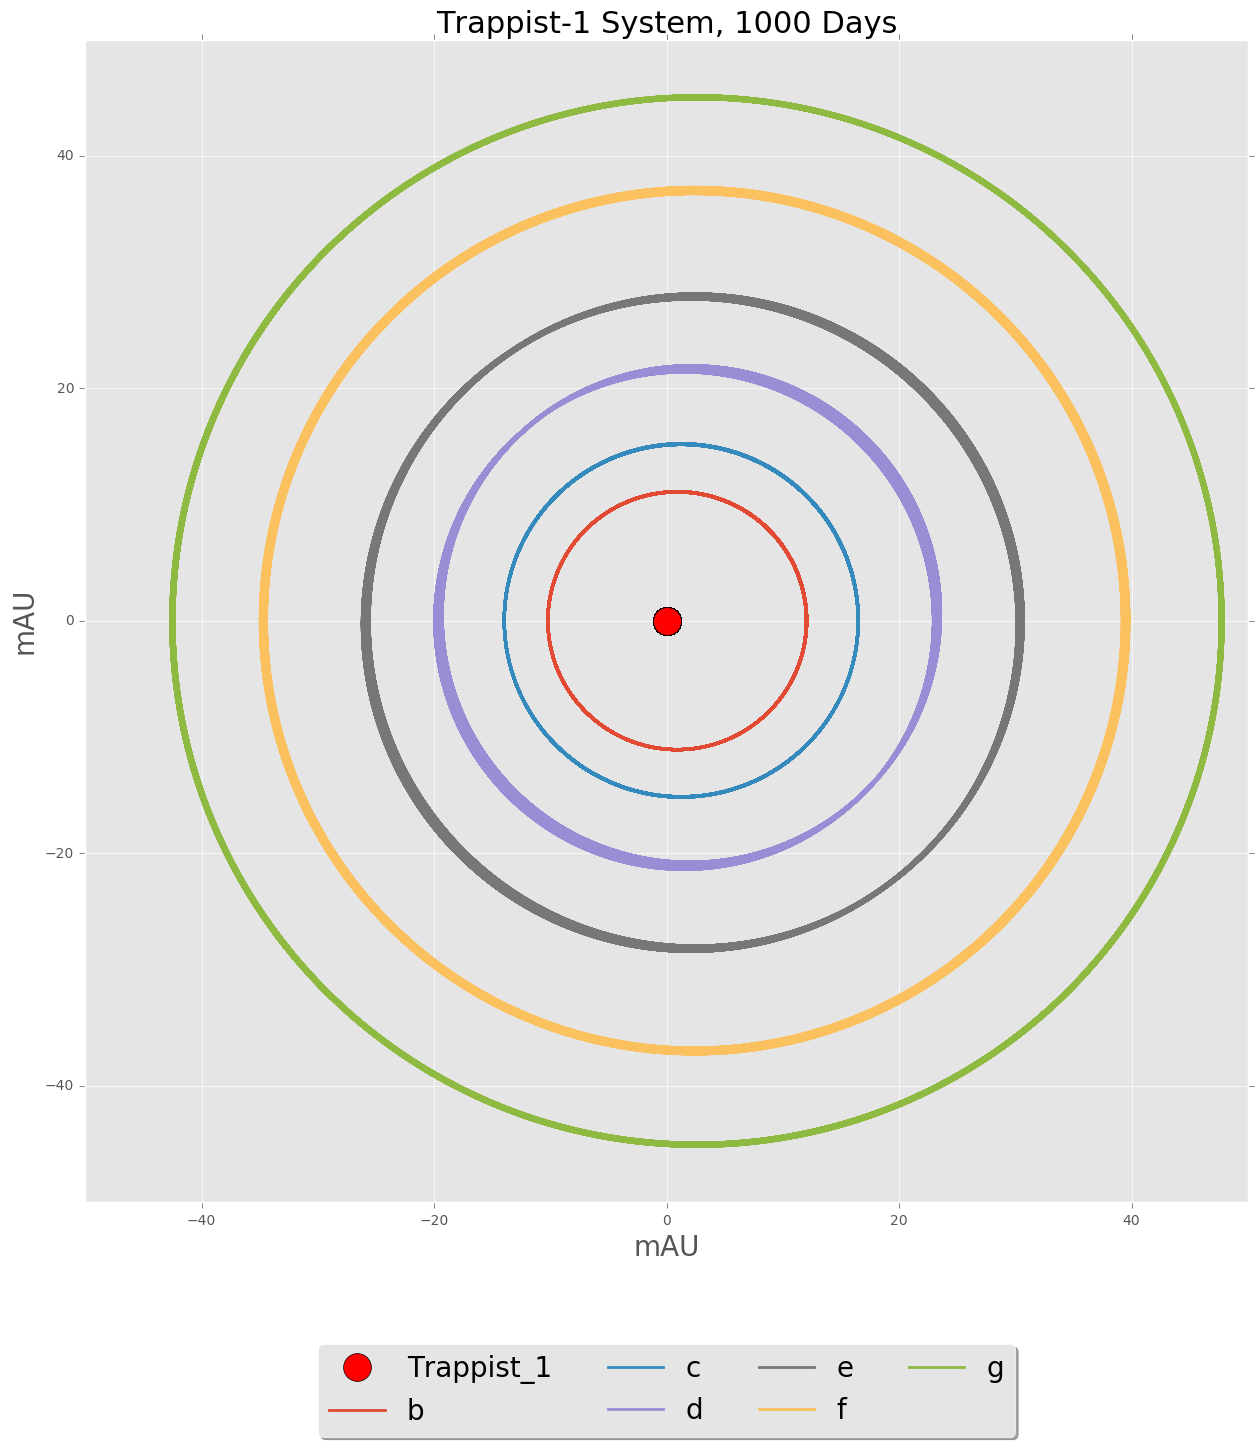

In [3]:
R = np.load('npy/R.npy')

fs = 20 # fontsize
lw = 2 # linewidth
units = 'mAU' # x-y units

fig = plt.figure(figsize=(15,15))

ax = plt.subplot(111)
ax.set_title('Trappist-1 System, 1000 Days', fontsize=fs+2)
ax.set_xlabel('%s' % units, fontsize=fs)
ax.set_ylabel('%s' % units, fontsize=fs)
ax.set_xlim([-50,50])
ax.set_ylim([-50,50])
ax.set_aspect(1)

ax.plot( R[0,:,0] , R[0,:,1] , 'ro' , markersize=20 , label=trp.names[0] )
for i in trp.bodies[1:]:
    ax.plot( R[i,:,0], R[i,:,1], lw=lw, label=trp.names[i])

ax.legend(loc='upper center', bbox_to_anchor=(.5,-.11), numpoints=1, ncol=4, fancybox=True, shadow=True, fontsize=fs)

### Trappist-1 Wobble
The four plots below show the positions of Trappist-1 over four different lengths of time. The small wobbling behavior of the dominant body in the system due to the smaller bodies in the system was actually the first method astronomers used to identify extra solar planets.

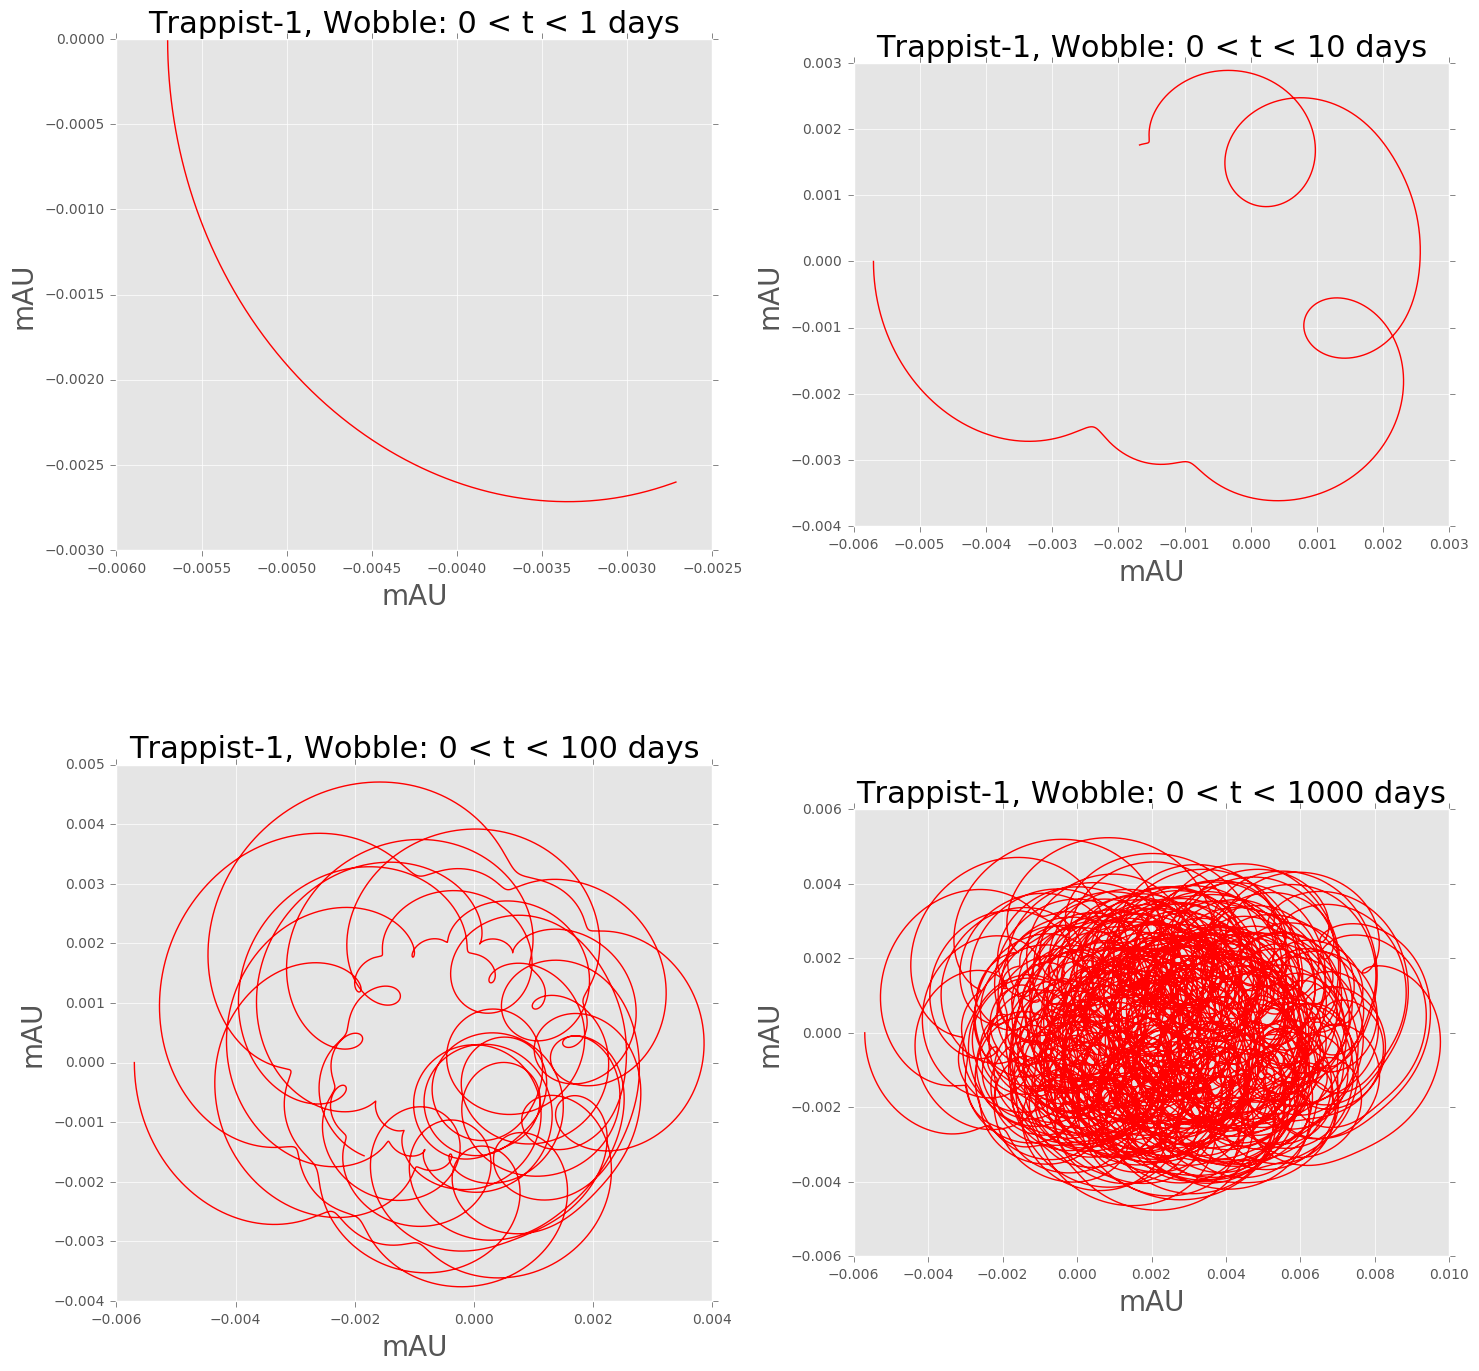

In [4]:
T = np.load('npy/T.npy')
DAYS = [1,10,100,1000]
N = [1,2,3,4]

dt = trp.dt
I_STOP = []

for d in DAYS:
    i_stop = (np.abs(T-d)).argmin()
    I_STOP.append( i_stop )

fig = plt.figure(figsize=(15,15))
def plot_axis(num,i_stop):
    ax = plt.subplot(2,2,num)
    ax.set_title('Trappist-1, Wobble: 0 < t < %s days' % int(T[i_stop]), fontsize=fs+2)
    ax.set_xlabel('%s' % units, fontsize=fs)
    ax.set_ylabel('%s' % units, fontsize=fs)
    ax.set_aspect(1)
    ax.plot( R[0,:i_stop,0] , R[0,:i_stop,1] , lw=1 , color='r')
    return ax

fig = plt.figure(figsize=(15,15))
for i in range(4):
    plot_axis(N[i],I_STOP[i])
plt.tight_layout()

### Energy Conservation
In ther perfect model, energy is conserved. This means that the Energy plot should ideally be a completely flat, horizontal line when there is no external energy source. Although not perfect, the behavior does show a flat line with relatively small deviation.

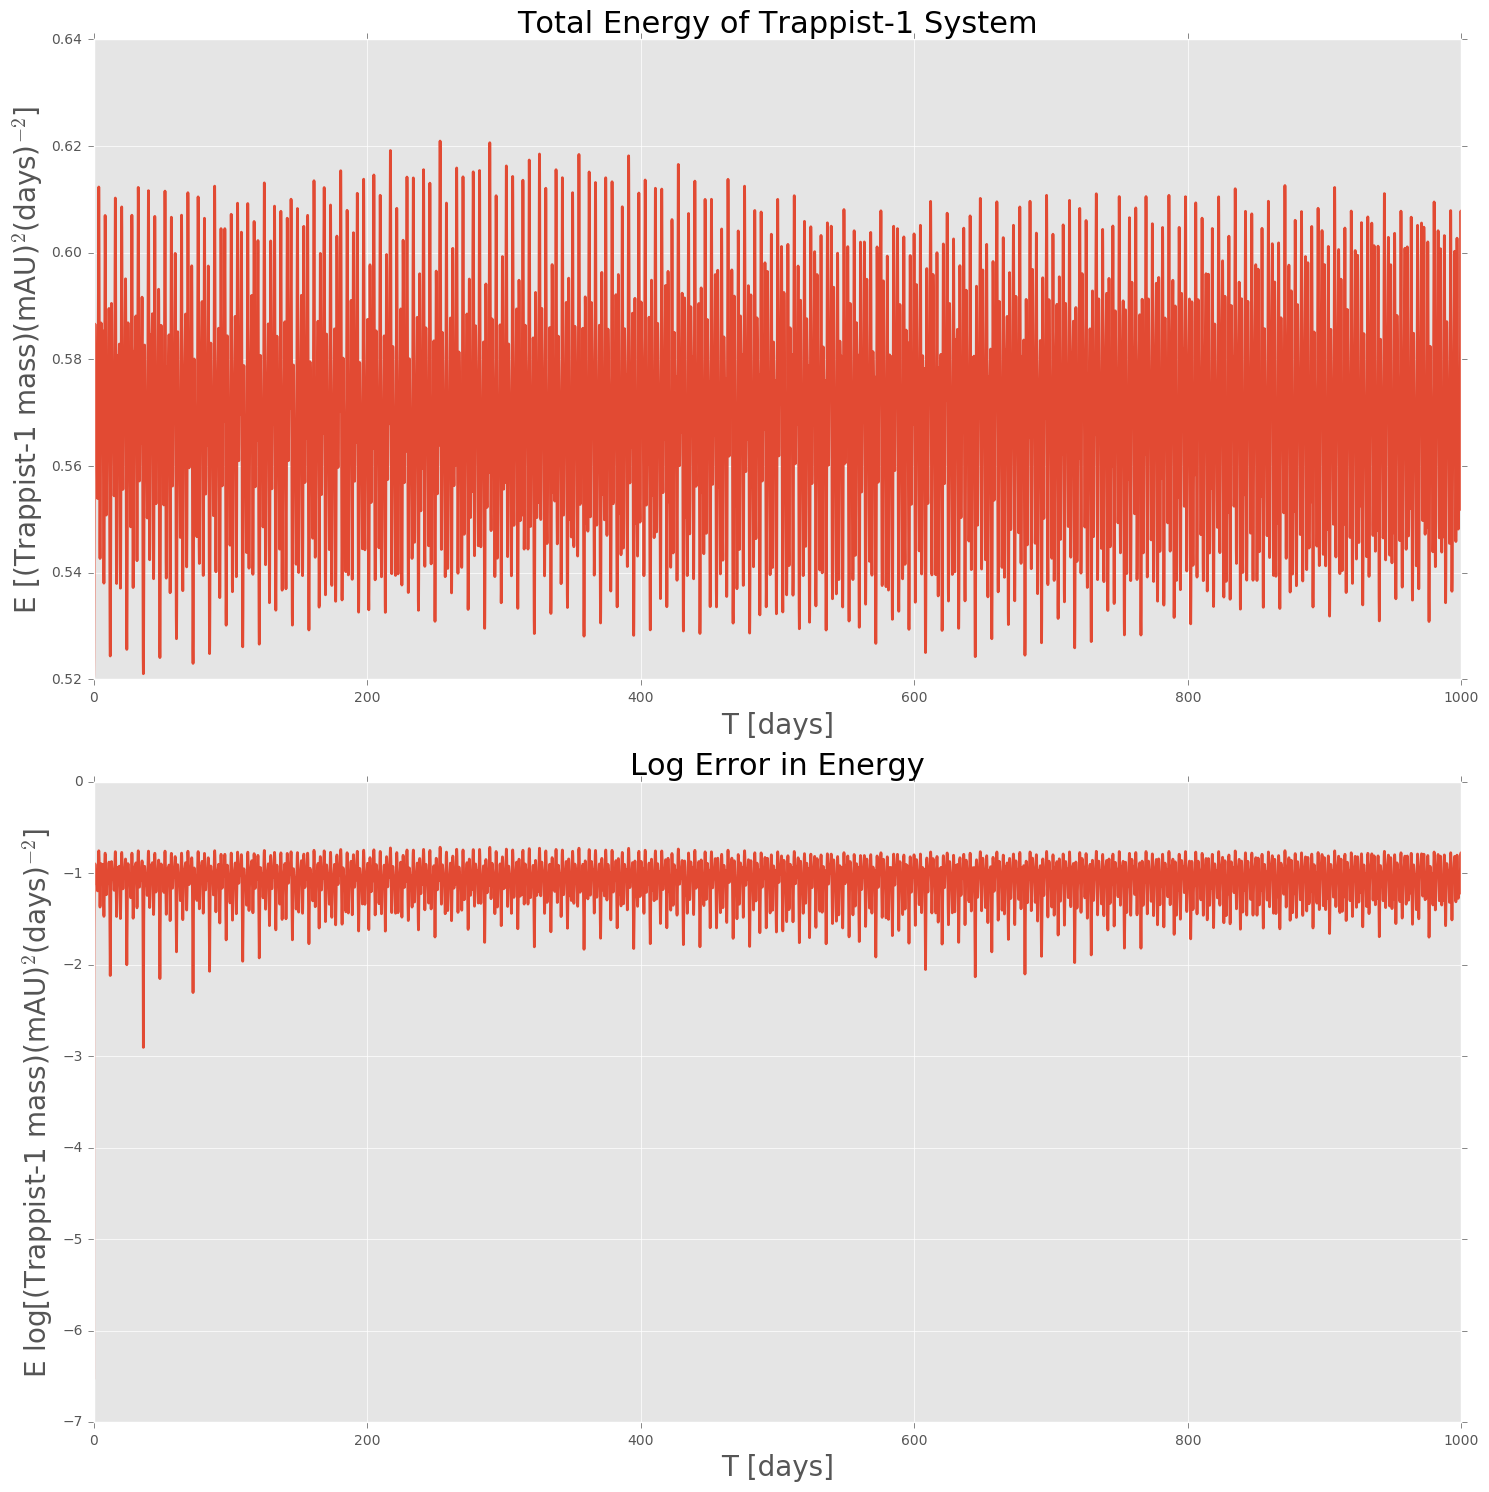

In [5]:
E = np.load('npy/E.npy')
E_err = np.load('npy/E_err.npy')

fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot(211)
ax1.set_title('Total Energy of Trappist-1 System', fontsize=fs+2)
ax1.set_xlabel('T [days]', fontsize=fs)
ax1.set_ylabel('E [(Trappist-1 mass)(mAU)$^2$(days)$^{-2}$]', fontsize=fs)
ax1.plot( T , E , lw=lw)
ax1.set_xlim([0,1000])

ax2 = plt.subplot(212)
ax2.set_title('Log Error in Energy', fontsize=fs+2)
ax2.set_xlabel('T [days]', fontsize=fs)
ax2.set_ylabel('E log[(Trappist-1 mass)(mAU)$^2$(days)$^{-2}$]', fontsize=fs)
ax2.plot( T[1:] , E_err , lw=2)
ax2.set_xlim([0,1000])

plt.tight_layout()

### Momentum Conservation
Momentum is also a conserved quality, since the inital conditions were set so that the total momentum was zero, the perfect model would be a completely flat line equal to zero. This does fit the general behavior with some small error.

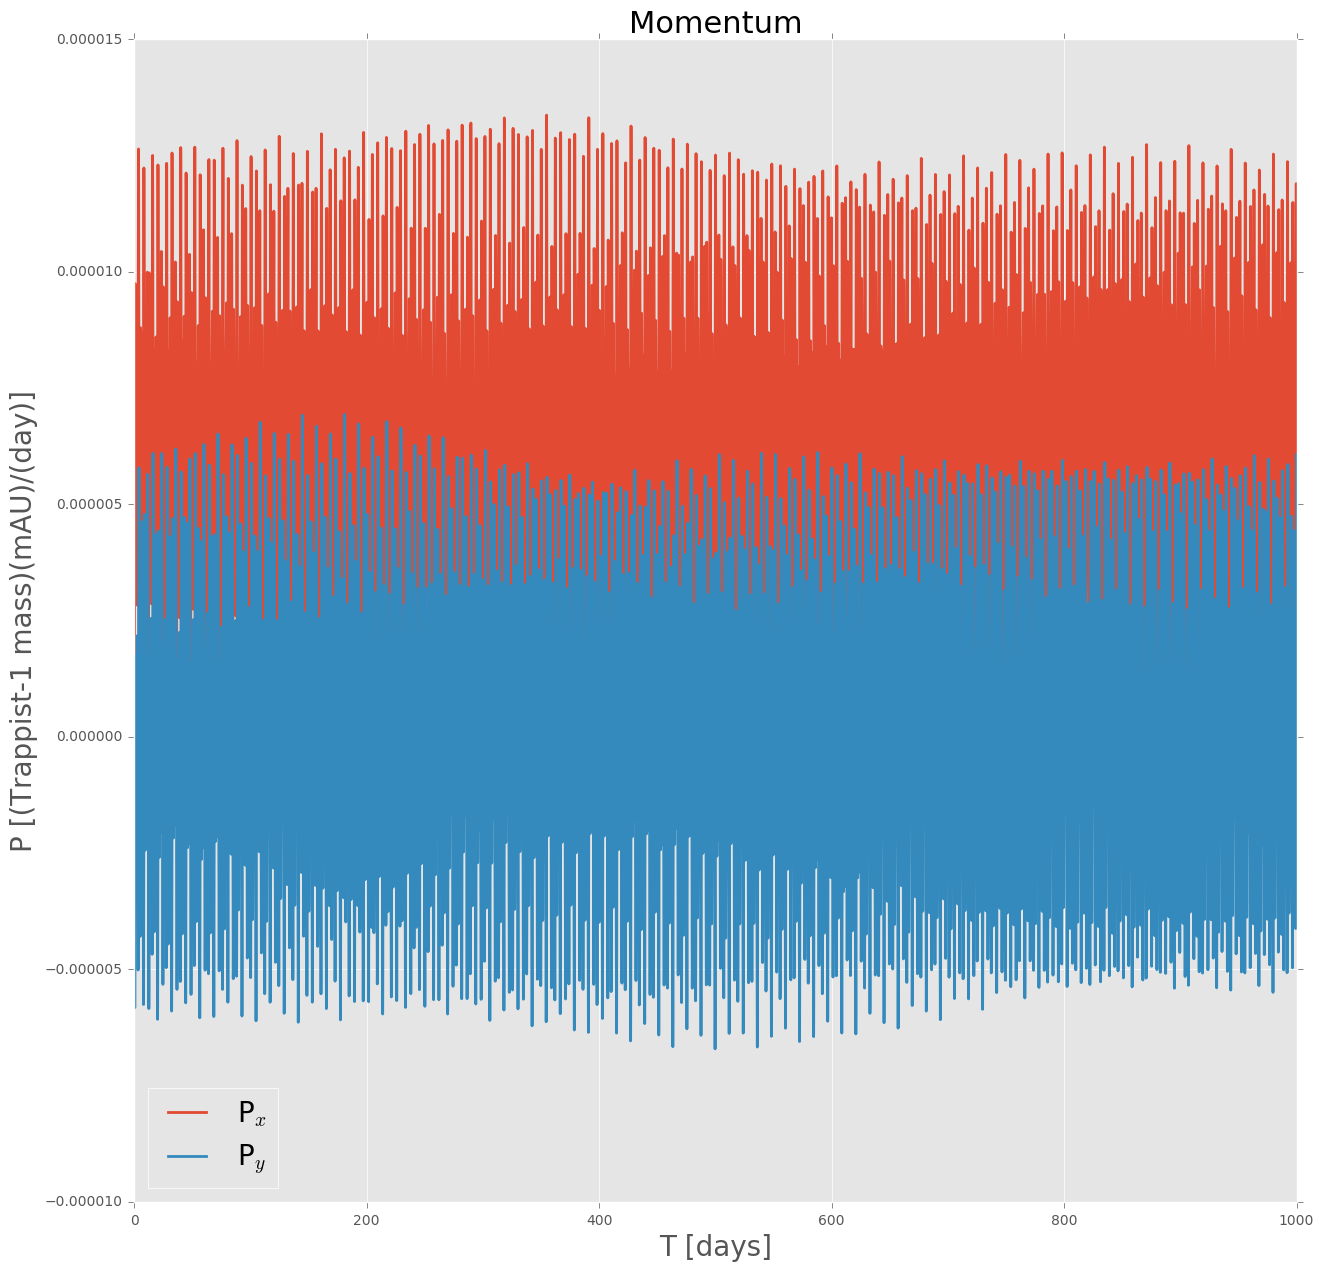

In [7]:
P = np.load('npy/P.npy')

fig = plt.figure(figsize=(15,15))

plt.title('Momentum', fontsize=fs+2)
plt.xlabel('T [days]', fontsize=fs)
plt.ylabel('P [(Trappist-1 mass)(mAU)/(day)]', fontsize=fs)
plt.xlim([0,1000])
plt.plot(T,P[:,0], lw=lw, label='P$_x$')
plt.plot(T,P[:,1], lw=lw, label='P$_y$')
plt.legend(loc='best', fontsize=fs)

### Nearby Planets
Table of average number of visible planets for each planet, along with one standard deviaiton. On the plots for each planet, the black line represents the average number of "visible" planets.

In [9]:
vis_avg = np.load('npy/vis_avg.npy')
prob = np.load('npy/prob.npy')

table = pd.DataFrame(data=prob, columns = ["Average Number of 'Visible' Planets",'1 $\\sigma$'], index = trp.names)
table

,Average Number of 'Visible' Planets,1 $\sigma$
Trappist_1,2.804089,0.396900
b,2.423666,0.812152
c,2.480830,0.877083
d,2.171351,1.028555
e,1.222418,0.996197
f,0.651406,0.755255
g,0.306977,0.521459


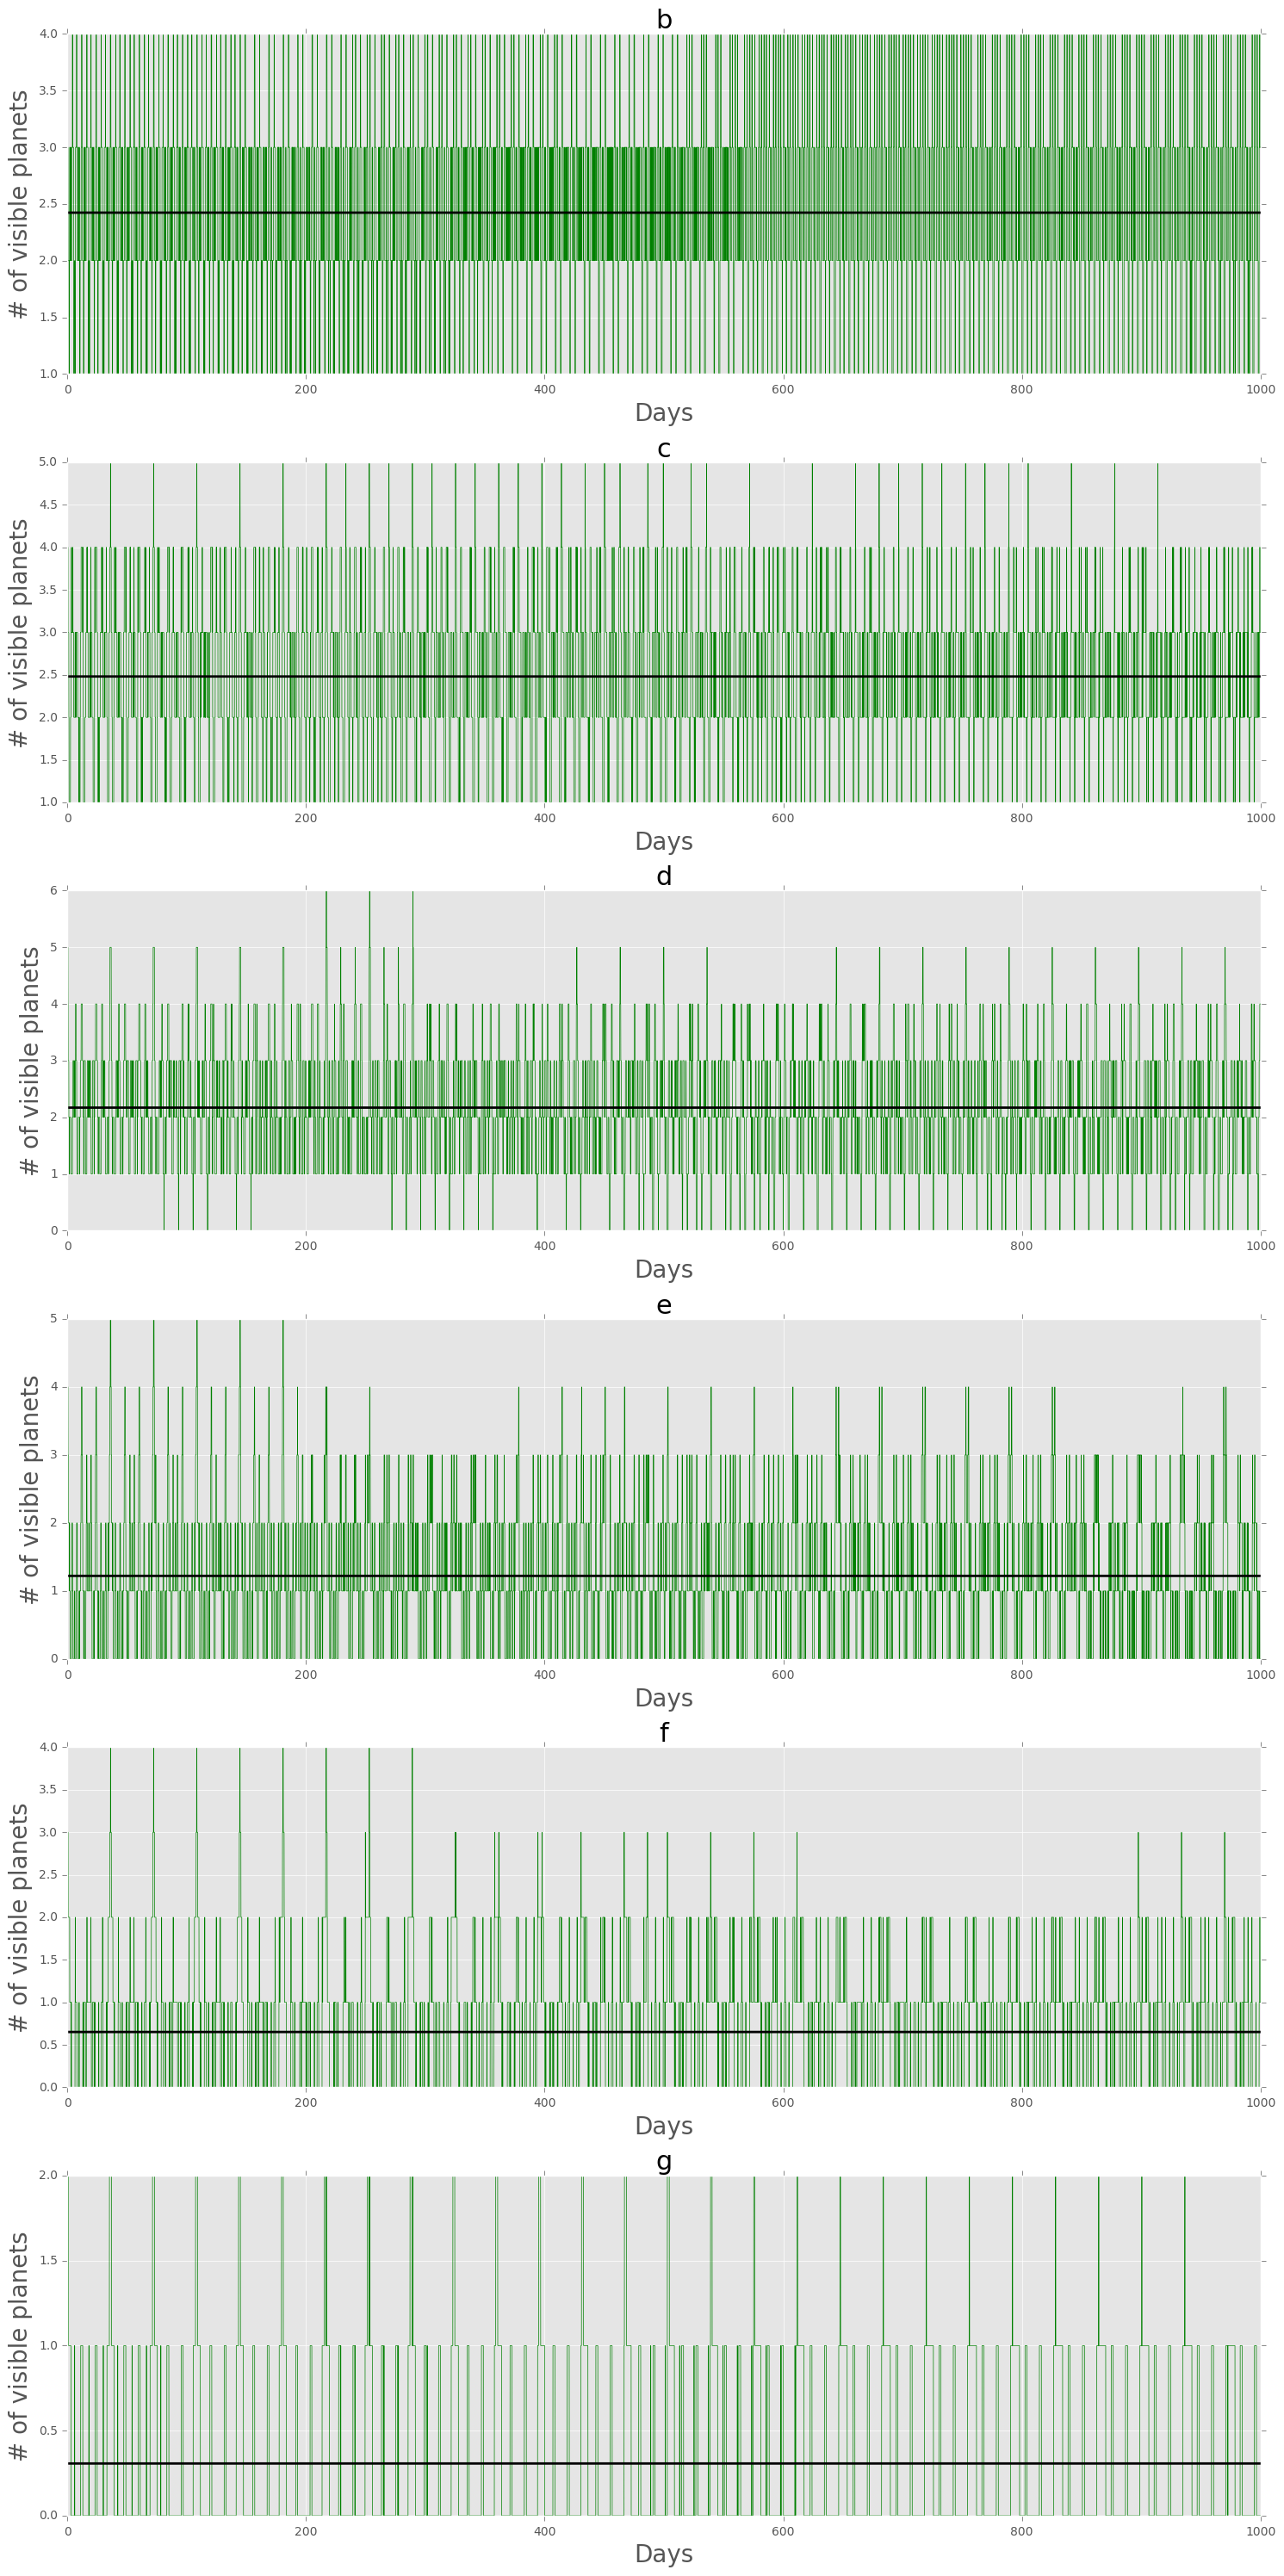

In [10]:
vis = np.load('npy/vis.npy')
fig = plt.figure(figsize = (15,30))
fs = 20
def plot_axis(i):
    ax = plt.subplot(6,1,i)
    plt.title(trp.names[i], fontsize = fs+2)
    plt.xlabel('Days', fontsize = fs)
    plt.ylabel('# of visible planets', fontsize = fs)
    plt.plot(T, vis[i,:], '-g', lw=.5)
    plt.plot(T, np.ones(trp.N)*vis_avg[i], lw=2, color ='k')
    plt.xlim([0,1000])
    return ax
    
for i in trp.bodies[1:]:
    plot_axis(i)
    
plt.tight_layout()


### Contriputions

Collaborators:
Jacob A. Cluff
Cameron Howard

trappist_1.py Contributions

Jacob Cluff:
imported libraries
-wrote "Constants and Conversions" section
-wrote "Find Initital Conditions" section
-wrote "Parameters Arrays" section
-wrote "Important Functions" section
-wrote "Integrators" section
-wrote "Energy" section
-wrote "Write Arrays" section - Cameron added in all "nearby planets" related code in this section
-wrote "probability" function in "nearby" section.

Cameron Howard:
-wrote Nearby section

project_2.ipynb Contributions

Jacob Cluff:
-wrote "Import" section
-wrote "Compile Position and Velocity Arrays" section
-wrote "1000 day Trajectories for Trappist-1 System" section
-wrote "Trappist-1 Wobble" section
-wrote "Energy Conservation" section
-wrote Momentum conservation" section

Cameron Howard:
-wrote "Nearby Planets" section



MIS contributions

Jacob Cluff:
README.txt
COLLABORATORS.txt
.gitignore
test.py
npy/** (except nearby planet related stuff)

Cameron Howard:
nearby planet related arrays in npy/